<a href="https://colab.research.google.com/github/lynseybwisa/IBM-Machine-Learning/blob/develop/Pearson_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Selection with Correlation

*   import libraries
*   import load_boston dataset
*   import pandas to read the data
*   import matplotlib to plot diagrams



In [60]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

*   Load the boston dataset into a variable
*   Create the dataframe
*   Use data.data to get all the independent features and data.feature names to know the independent feature names
*   dependent feature is MEDV and it's called as data.target









In [61]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

look at the dataset description

In [62]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [63]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
df.shape

(20640, 9)

In [65]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [66]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

create the independent and dependent features (x and y)

In [67]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [68]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [69]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [70]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MEDV, dtype: float64

separate dataset into train and test

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

pearson correlation ranges between -1 to 1

In [72]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


use seaborn for pearson correlation

In [73]:
import seaborn as sns

In [74]:
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

find out he correlation by using corr() function

In [75]:
cor = X_train.corr()

create a heatmap with correlation as annot=True and add some coloring with plt.cm

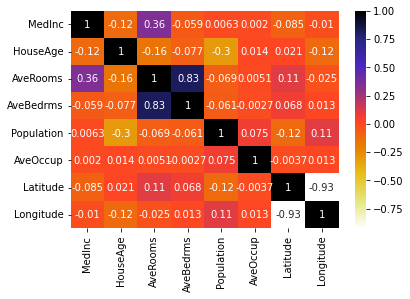

In [76]:
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

create a function called correlation that will take the x_train dataset and threshold value thats at least 70%

then traverse through all the correlation matrix columns and compare with each and every column to check if the correlation is greater than the threshold value. then take the column, store it in a columnname and add it to a list



In [77]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

give threshold of 70% and find the length of the corr features by calling the correlation function

In [78]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

1

In [79]:
corr_features

{'AveBedrms'}

drop correlated features on both train and test data. if you repeat this function for correlation in the test data it'll bring overfitting

In [80]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15,-121.62
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66,-117.17
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89,-117.91
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56,-119.64


#Bigger dataset

In [81]:
#install kaggle
!pip install -q kaggle

In [82]:
#upload the kaggle file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lynseybwisa55","key":"f849edf5c087486d41b18c9067d33c15"}'}

In [83]:
#create the kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [84]:
#copy the kaggle.json into kaggle folder
! cp kaggle.json ~/.kaggle/

In [85]:
#grant permissions for the json to act
! chmod 600  ~/.kaggle/kaggle.json

In [86]:
! kaggle competitions download -c santander-customer-satisfaction

santander-customer-satisfaction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
!unzip santander-customer-satisfaction.zip

Archive:  santander-customer-satisfaction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [88]:
df=pd.read_csv('train.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

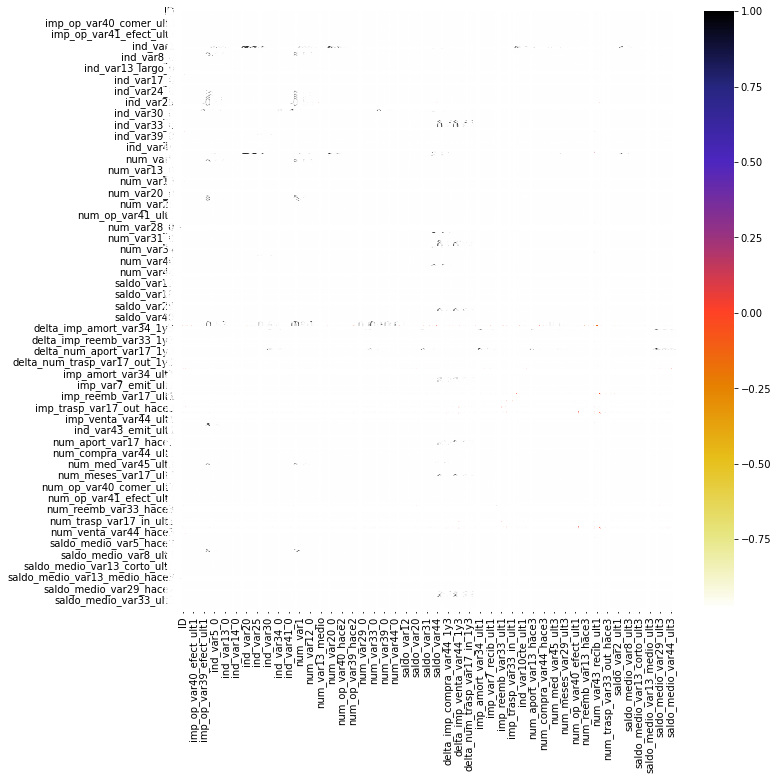

In [57]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, annot=True, cmap=plt.cm.CMRmap_r)

In [91]:
correlation_features = correlation(X_train, 0.9)
len(set(correlation_features))

155

In [92]:
correlation_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17

In [93]:
X_train.drop(correlation_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15
